<h1>Importing Libraries & Data Loading </h1>


In [94]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore') 

In [95]:
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')

<h1>Data Preprocessing</h1>


In [96]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [97]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [98]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [99]:
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [100]:
stroke_data.shape

(5110, 12)

<h1>Feature Extraction & Data Cleaning </h1>


In [101]:
stroke_data = stroke_data.drop(['id'], axis = 1)

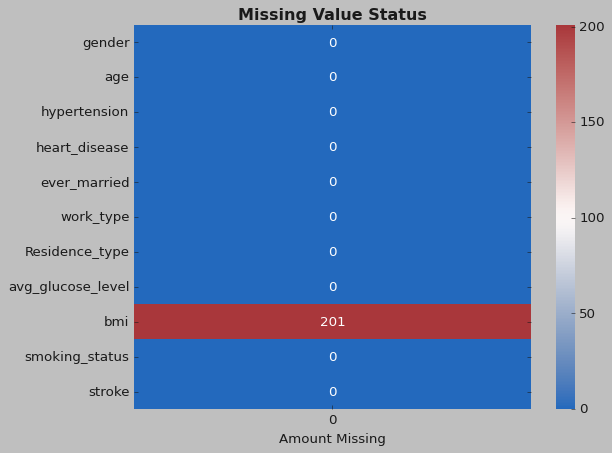

In [102]:
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(stroke_data.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

In [103]:
stroke_data['bmi'] = stroke_data['bmi'].fillna(stroke_data['bmi'].mean())

stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


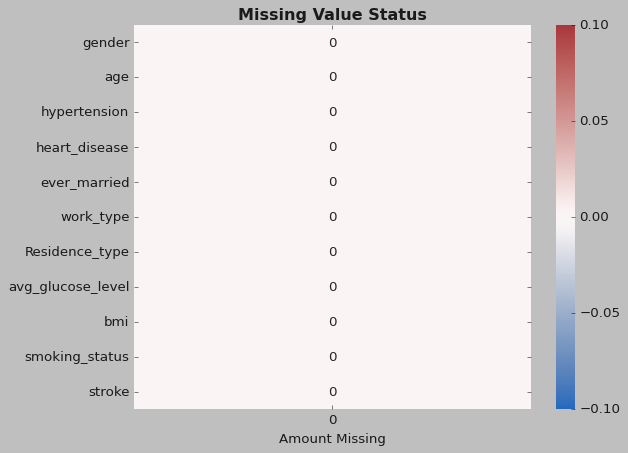

In [104]:
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(stroke_data.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

In [105]:
print("Number of Duplicate Rows: ", stroke_data.duplicated().sum())

Number of Duplicate Rows:  0


<h1>Outlier Detection</h1>


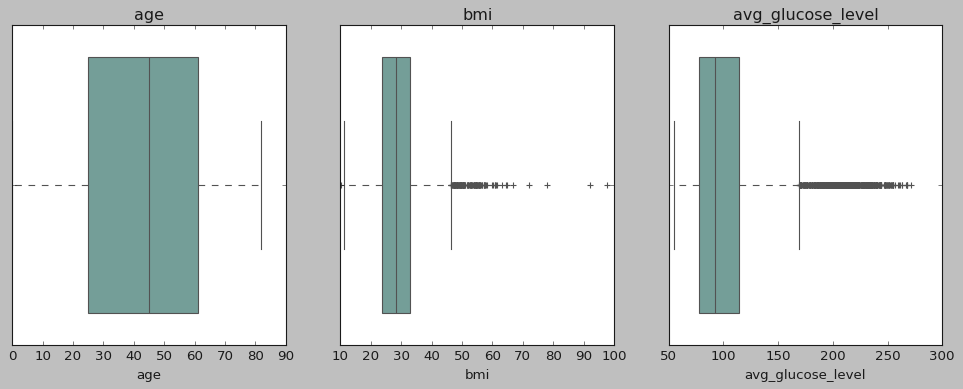

In [106]:
num_cols = ['age','bmi','avg_glucose_level']

plt.figure(figsize=(15, 5))
for i in range(3) :
    plt.subplot(1,3,i+1)
    
    sns.boxplot(x=stroke_data[num_cols[i]],color='#6DA59D')
    plt.title(num_cols[i])
plt.show()

In [107]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
en_stroke = stroke_data.apply(le.fit_transform)
en_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,240,1,1
1,0,82,0,0,1,3,0,3588,162,2,1
2,1,101,0,1,1,2,0,2483,199,2,1
3,0,70,0,0,1,2,1,3385,218,3,1
4,0,100,1,0,1,3,0,3394,113,2,1


In [108]:
# Function to count outliers using IQR method
def count_outliers_iqr(column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    num_outliers = sum((column > upper_limit) | (column < lower_limit))
    return num_outliers

# Select numerical columns
num_cols = en_stroke.select_dtypes(include=['int', 'float']).columns

# Count outliers for each numerical column
for col in num_cols:
    num_outliers = count_outliers_iqr(en_stroke[col])
    print(f"Number of outliers in {col}: {num_outliers}")

# Optionally, remove outliers from the dataset
for col in num_cols:
    q1 = np.percentile(en_stroke[col], 25)
    q3 = np.percentile(en_stroke[col], 75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    en_stroke = en_stroke[(en_stroke[col] >= lower_limit) & (en_stroke[col] <= upper_limit)]

print("\nOutliers removed")
# Count outliers again after removal
for col in num_cols:
    num_outliers = count_outliers_iqr(en_stroke[col])
    print(f"Number of outliers in {col} (after removal): {num_outliers}")

Number of outliers in gender: 0
Number of outliers in age: 0
Number of outliers in hypertension: 498
Number of outliers in heart_disease: 276
Number of outliers in ever_married: 0
Number of outliers in work_type: 657
Number of outliers in Residence_type: 0
Number of outliers in avg_glucose_level: 0
Number of outliers in bmi: 120
Number of outliers in smoking_status: 0
Number of outliers in stroke: 249

Outliers removed
Number of outliers in gender (after removal): 0
Number of outliers in age (after removal): 0
Number of outliers in hypertension (after removal): 0
Number of outliers in heart_disease (after removal): 0
Number of outliers in ever_married (after removal): 0
Number of outliers in work_type (after removal): 0
Number of outliers in Residence_type (after removal): 0
Number of outliers in avg_glucose_level (after removal): 0
Number of outliers in bmi (after removal): 9
Number of outliers in smoking_status (after removal): 0
Number of outliers in stroke (after removal): 0


<h1>Exploratory Data Analysis</h1>


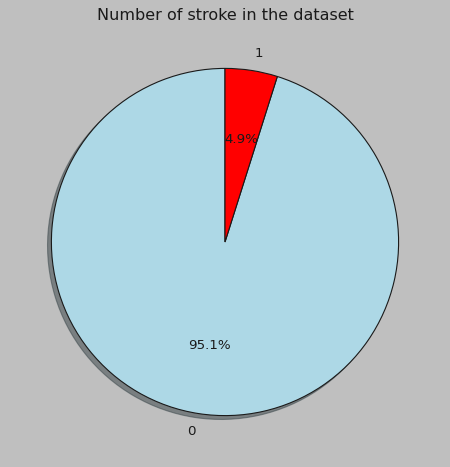

In [109]:
labels =stroke_data['stroke'].value_counts(sort = True).index
sizes = stroke_data['stroke'].value_counts(sort = True)

colors = ["lightblue","red"]
 
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90 )

plt.title('Number of stroke in the dataset')
plt.show()

We can see from the pie chart that only 5% of people have experienced a stroke!


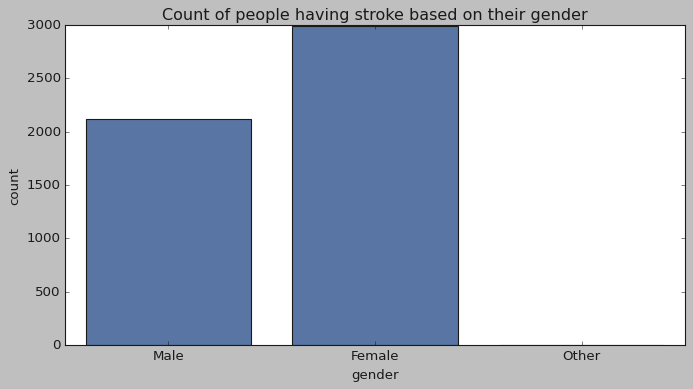

In [110]:
plt.figure(figsize=(10,5))
sns.countplot(data=stroke_data,x='gender')
plt.title('Count of people having stroke based on their gender')
plt.show()

In [111]:
fig = make_subplots( rows=2, cols=2,subplot_titles=('','<b>Distribution Of Female Ages<b>','<b>Distribution Of Male Ages<b>','Residuals'),
vertical_spacing=0.09, specs=[[{"type": "pie","rowspan": 2},{"type": "histogram"}], [None,{"type": "histogram"}],])

fig.add_trace(go.Pie(values=stroke_data.gender.value_counts().values,labels=['<b>Female<b>','<b>Male<b>','<b>Other<b>'],hole=0.3,pull=[0,0.08,0.3],
marker_colors=['pink','lightblue','green'],textposition='inside'), row=1, col=1)

fig.add_trace(go.Histogram(x=stroke_data.query('gender=="Female"').age,marker= dict(color='pink'),name='Female Ages'),row=1, col=2)

fig.add_trace(go.Histogram(x=stroke_data.query('gender=="Male"').age,marker= dict(color='lightblue'),name='Male Ages'),row=2, col=2)

fig.update_layout(height=800,showlegend=True,title_text="<b>Age-Sex Infrence<b>",)

fig.show()

Text(0, 0.5, 'Count')

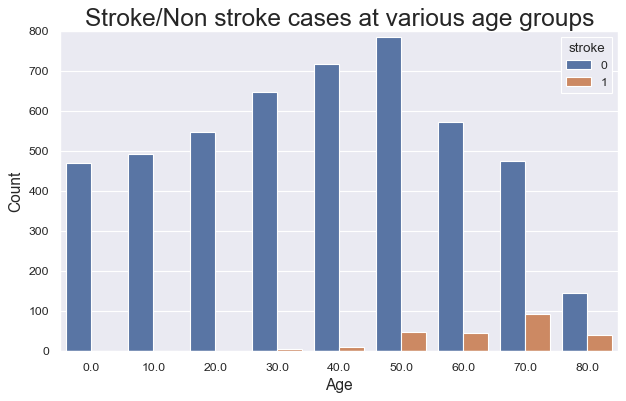

In [112]:
age_bins = np.linspace(0,90,10)
stroke_data['binned_age'] = pd.cut(stroke_data['age'], age_bins, labels=age_bins[:-1],right=False)

sns.set(rc={'figure.figsize':(9,5)})
ax = sns.countplot(x='binned_age',hue='stroke',data=stroke_data)
ax.set_title('Stroke/Non stroke cases at various age groups').set_fontsize(22)
ax.set_xlabel('Age',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

#  1 -> People who had stroke
#  0 -> People who did not have stroke

<Figure size 1360x560 with 0 Axes>

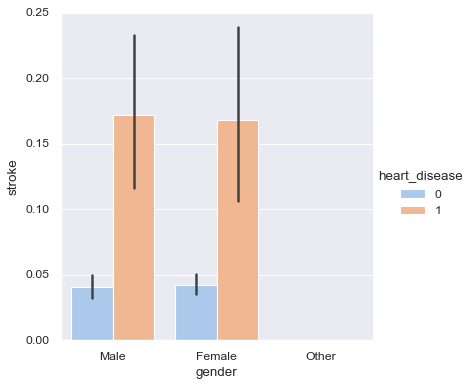

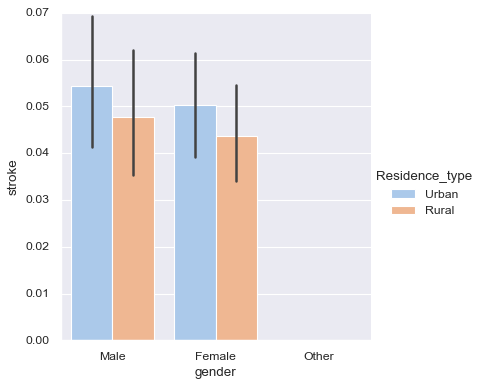

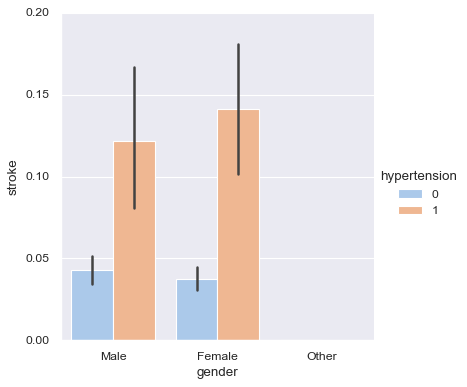

In [113]:
plt.figure(figsize=(17,7))
sns.catplot(x="gender", y="stroke", hue="heart_disease", palette="pastel", kind="bar", data=stroke_data)
sns.catplot(x="gender", y="stroke", hue="Residence_type", palette="pastel", kind="bar", data=stroke_data)
sns.catplot(x="gender", y="stroke", hue="hypertension", palette="pastel", kind="bar", data=stroke_data)
plt.show()

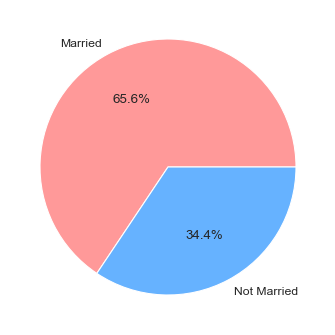

In [114]:
married = dict(stroke_data['ever_married'].value_counts())
fig = plt.pie([married['Yes'],married['No']],labels=['Married','Not Married'],autopct='%1.1f%%',colors=['#FF9999','#66B2FF'])

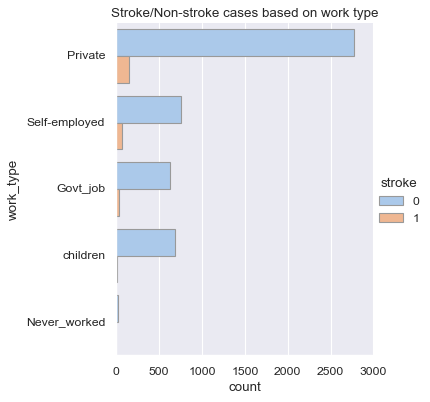

In [115]:
sns.catplot(y="work_type", hue="stroke", kind="count", palette="pastel", edgecolor=".6", data=stroke_data)
plt.title('Stroke/Non-stroke cases based on work type')
plt.show()

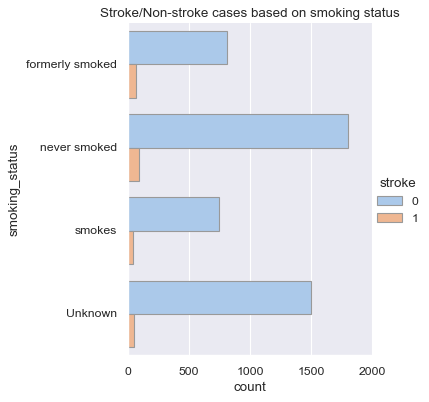

In [116]:
sns.catplot(y="smoking_status", hue="stroke", kind="count", palette="pastel", edgecolor=".6", data= stroke_data)
plt.title('Stroke/Non-stroke cases based on smoking status')
plt.show()

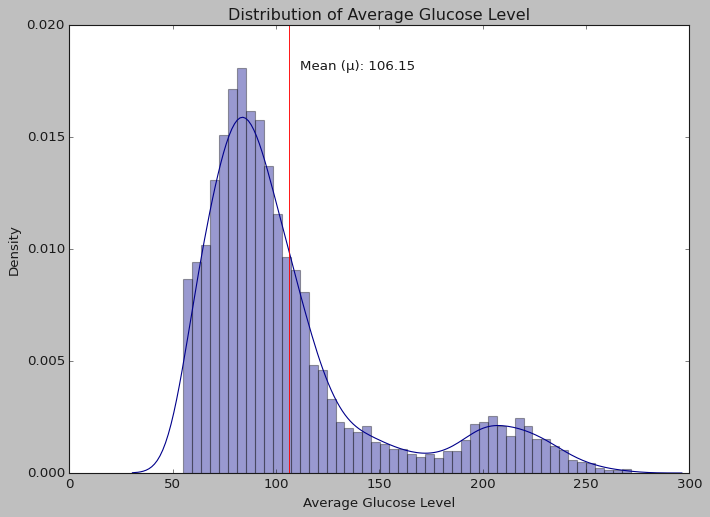

In [117]:
plt.style.use("classic")
plt.figure(figsize=(10, 7))
sns.distplot(stroke_data['avg_glucose_level'], color='darkblue', kde=True)
plt.axvline(stroke_data['avg_glucose_level'].mean(), color='red', linestyle='-', linewidth=0.8)
min_ylim, max_ylim = plt.ylim()
plt.text(stroke_data['avg_glucose_level'].mean()*1.05, max_ylim*0.9, 'Mean (μ): {:.2f}'.format(stroke_data['avg_glucose_level'].mean()))
plt.xlabel("Average Glucose Level")
plt.title(f"Distribution of Average Glucose Level")
plt.show()

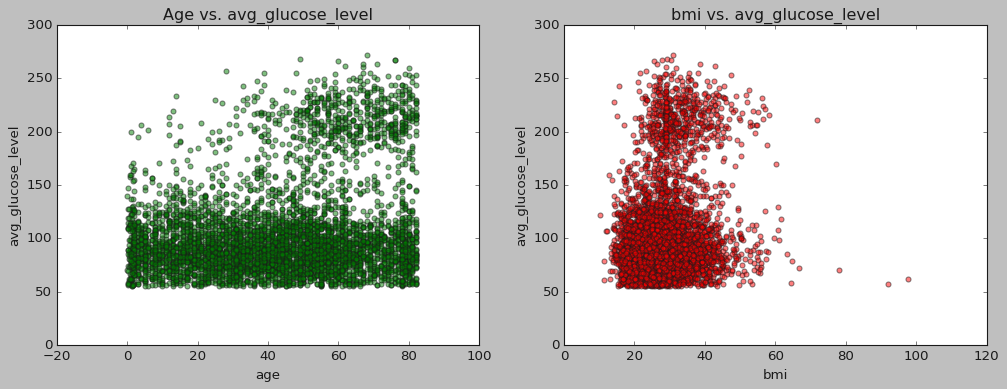

In [118]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
stroke_data.plot(kind='scatter', x='age', y='avg_glucose_level', alpha=0.5, color='green', ax=axes[0], title="Age vs. avg_glucose_level")
stroke_data.plot(kind='scatter', x='bmi', y='avg_glucose_level', alpha=0.5, color='red', ax=axes[1], title="bmi vs. avg_glucose_level")
plt.show()

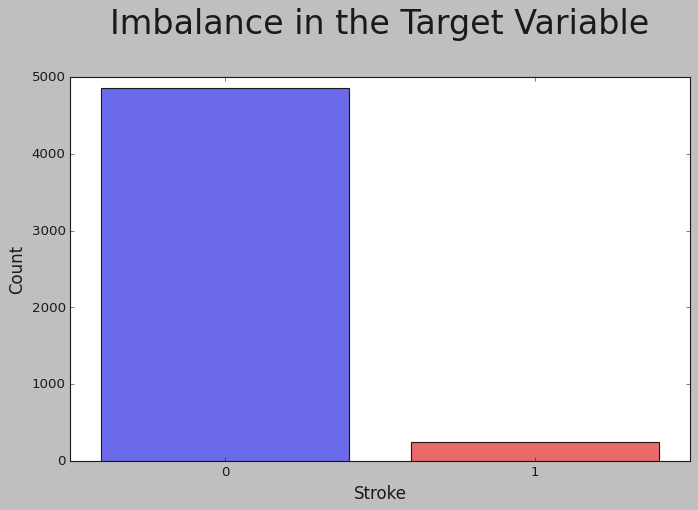

In [119]:
plt.figure(figsize=(10,6))
cp=sns.countplot(x=stroke_data["stroke"],palette="seismic")
plt.title("Imbalance in the Target Variable\n",fontsize=30)
plt.xlabel("Stroke",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [120]:
fig = px.parallel_categories(stroke_data[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status', 'stroke']], color='stroke', color_continuous_scale=px.colors.sequential.Inferno)
figsize=(30, 20)
fig.show()

# The yellow point in the figure shows the person who had a stroke and grey points show the person who did not have a stroke.